# MA2K4 Assignment 2

Student ID - 2103654 and 2161367

### 2.6) a)

In [1]:
# Libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Implementing Lambda functions to compute Lebesgue constant for equally m spaced nodes
def Lambda(m) :
    nodes = np.linspace(-1,1,m+1)
    x_values = np.linspace(-1,1,100)
    
    # calculating L_k using dummy variables x and j
    L_k = lambda x,j: np.prod([(x-nodes[m]) / (nodes[j] - nodes[m]) for m in range(len(nodes)) if m != j])
    
    # approximating max norm by taking maximum of 100 values of x
    L_values = [sum(abs(L_k(x, j)) for j in range(m)) for x in x_values]
    
    return np.max(L_values)
    
# computing lambda_10 as required
lambda10= Lambda(10)
print("Lesbesgue constant for m=10:", lambda10)

Lesbesgue constant for m=10: 29.88523398810152


### 2.6) b)

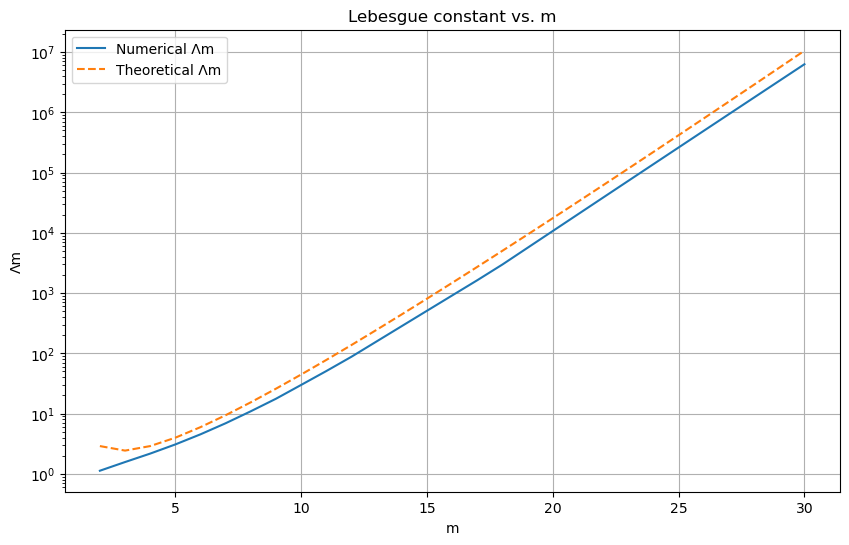

In [2]:
# Compute Lebesgue constant for m values up to 30
# Also compute the similar behaviour values under 'comparison'
m_vals = range(2,31)
lambda_vals = []
comparison = []

for m in m_vals:
    value = Lambda(m)
    lambda_vals.append(value)
    
    result = 2**m / (m*np.log(m))
    comparison.append(result)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(m_vals, lambda_vals, label='Numerical Λm')
plt.semilogy(m_vals, comparison, label='Theoretical Λm', linestyle='--')
plt.xlabel('m')
plt.ylabel('Λm')

plt.title('Lebesgue constant vs. m')
plt.legend()
plt.grid(True)
plt.show()

#### Interpretation
We know that small changes in the data give rise to small changes in the interpolating polynomial only if the Lebesgue constant is small. 

Well-posedness: the behaviour of $\Lambda_m$ suggests that increasing the number of nodes (m) makes the problem more and more ill-conditioned. This is because the Lebesgue constant increases logarithmically as m increases which indicates a high level of sensitivity to small perturbations in the function.

Stability: a high Lebesgue constant can lead to numerical instability as the solution is highly sensitive to the input data.

Convergence: the behaviour of $\Lambda_m \sim \frac{2^m}{m \log m}$ suggests that as you increase the number of nodes, the convergence rates falls. Therefore, increasing the number of nodes beyond a certain point may not significantly improve the accuracy of the interpolation.



### 2.6) c)

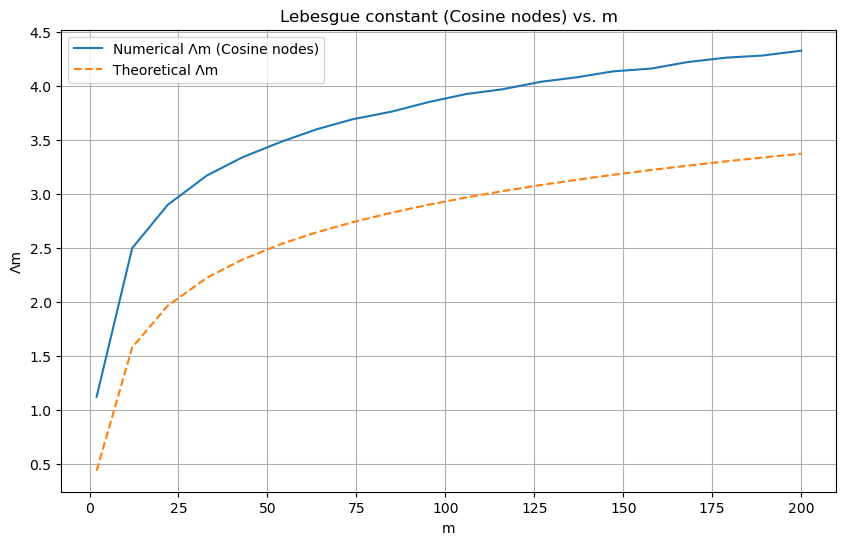

In [3]:
# Implementing Lambda functions to compute Lebesgue constant for equally m spaced nodes
def LambdaC(m) :
    nodes=[]
    # change of nodes
    for i in range(m+1):
        x_i= np.cos(i*np.pi/m)
        nodes.append(x_i)
        
    x_values=np.linspace(-1, 1, 200)
    
    # defining L_k using dummy variables
    L_k = lambda x,j: np.prod([(x-nodes[m]) / (nodes[j] - nodes[m]) for m in range(len(nodes)) if m != j])
    
    L_values = [sum(abs(L_k(x, j)) for j in range(m)) for x in x_values]
    
    return np.max(L_values)

# Compute Lebesgue constant for 20 values of m up to 200
m_values = np.linspace(2, 200, 20, dtype=int)
lambdaC = []
comparison2 = []

for m in m_values:
    value = LambdaC(m)
    lambdaC.append(value)
    
    result = 2 * np.log(m)/ np.pi
    comparison2.append(result)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(m_values, lambdaC, label='Numerical Λm (Cosine nodes)')
plt.plot(m_values, comparison2, label='Theoretical Λm', linestyle='--')
plt.xlabel('m')
plt.ylabel('Λm')
plt.title('Lebesgue constant (Cosine nodes) vs. m')
plt.legend()
plt.grid(True)
plt.show()

In this case, the Lebesgue constants plateau and stay under 4.5 for values of m up to 200. This is in contrast to the exponentially increasing Lebesgue constants with equidistant nodes. This would suggest that picking these new nodes lends itself to a more stable solution.

### 2.7) a)

In [4]:
# Recursive function
def recursive_f(f, nodes):
    # Base case if no nodes or only one node
    if len(nodes) <= 1:
        return f(nodes[0])
    # Recursion
    else:
        retVal = (recursive_f(f, nodes[1:]) - recursive_f(f, nodes[:-1])) / (nodes[-1] - nodes[0])
        return retVal

# Priniting value
print("For f(x) = sin(x), we compute f[0, 1, 2 ,3] =", recursive_f(np.sin, [0, 1, 2, 3]))

For f(x) = sin(x), we compute f[0, 1, 2 ,3] = -0.010393219665581396


### 2.7) b)

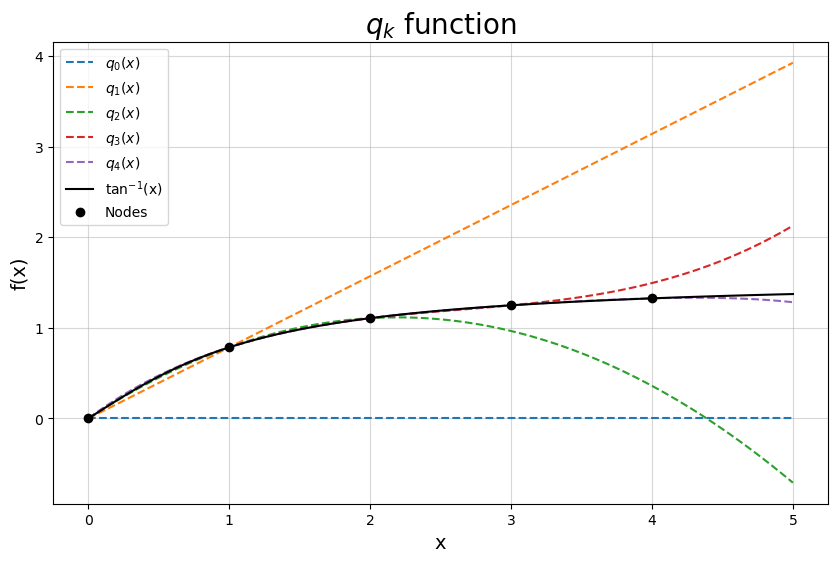

In [5]:
# Defining function
def qk(f, nodes, k, x):
    # Base case
    if k == 0:
        array = np.full((len(x)), f(x[0]))
        return array
    # Recursion
    else:
        temp = 1
        for j in range(k):
            temp *= (x - nodes[j])
        ret = qk(f, nodes, k-1, x) + recursive_f(f, nodes[:k+1])*temp
        return ret
    
# Setting initial conditions
func = np.arctan
xArr = np.linspace(0, 5, 100)
xNodes = [0, 1, 2, 3, 4]
yNodes = func(xNodes)
# Plotting onto the same graph
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(xArr, qk(func, xNodes, i, xArr), '--', label = f'$q_{i}(x)$')  # Plot each qk
yArr = np.arctan(xArr)
plt.plot(xArr, yArr, 'k-', label = "tan$^{-1}$(x)")
plt.plot(xNodes, yNodes, 'ko', label = 'Nodes') # Nodes

# Graph settings
plt.title("$q_k$ function", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

Using our function qk to plot f(x) = tan$^{−1}$(x) for the nodes x = (0, 1, 2, 3, 4), for k ∈ {0, 1, 2, 3, 4} on the interval x ∈ [0, 5]. We have also plotted f(x) for comparison, and plotted the location of all nodes.

### 2.8) a)

In [6]:
# Defining our three functions

# midpoint function
def midpoint(f, a, b):
    return (b - a) * f(0.5 * (a + b))

# trapezoidal function
def trapezoidal(f, a, b):
    return 0.5 * (b - a) * (f(a) + f(b))

# simpson function
def simpson(f, a, b):
    return ((b - a) / 6) * (f(a) + (4 * f(0.5 * (a + b))) + f(b))
      
# Defining exp(2x)
def e2(x):
    return np.exp(2 * x)

a = -1
b = 1
yMid = midpoint(e2, a, b)
yTrap = trapezoidal(e2, a, b)
ySimp = simpson(e2, a, b)

# exact value
exact = 3.626860407847019
# Compute errors
error_mid = np.abs(yMid - exact)
error_trap = np.abs(yTrap - exact)
error_simp = np.abs(ySimp - exact)

# Print results
print("Method\t\tValue\t\tError")
print("Midpoint\t{:.2f}\t\t{:.2f}".format(yMid, error_mid))
print("Trapezoidal\t{:.2f}\t\t{:.2f}".format(yTrap, error_trap))
print("Simpson\t\t{:.2f}\t\t{:.3g}".format(ySimp, error_simp))

Method		Value		Error
Midpoint	2.00		1.63
Trapezoidal	7.52		3.90
Simpson		3.84		0.215


Values given are to 3 significant figures. Our results show that the Cavalieri-Simpson quadrature formula gave the smallest absolute error meaning it had the best approximation. On the other hand, the trapezoidal quadrature formula gave the largest error, around 20 times bigger than the Simpson error. The midpoint formula gave an error in between the other two, about 8 times larger than the Simpson formula. This makes sense as the midpoint and trapezoidal formulas do not take into account for the exponential growth of f(x). Therefore, estimating just based on the midpoint or endpoints gives a larger error.

### 2.8) b)

Results for the integral of f(x) = 1/(1 + x) on the interval [0, h] with different values of h=2^(-k):
h               Exact Result         Midpoint             Trapezoidal          Simpson's           
1               0.6931471806         0.6666666667         0.7500000000         0.6944444444        
0.5             0.4054651081         0.4000000000         0.4166666667         0.4055555556        
0.25            0.2231435513         0.2222222222         0.2250000000         0.2231481481        
0.125           0.1177830357         0.1176470588         0.1180555556         0.1177832244        
0.0625          0.0606246218         0.0606060606         0.0606617647         0.0606246286        
0.03125         0.0307716587         0.0307692308         0.0307765152         0.0307716589        
0.015625        0.0155041865         0.0155038760         0.0155048077         0.0155041865        
0.0078125       0.0077821404         0.0077821012         0.0077822190         0.0077821404      

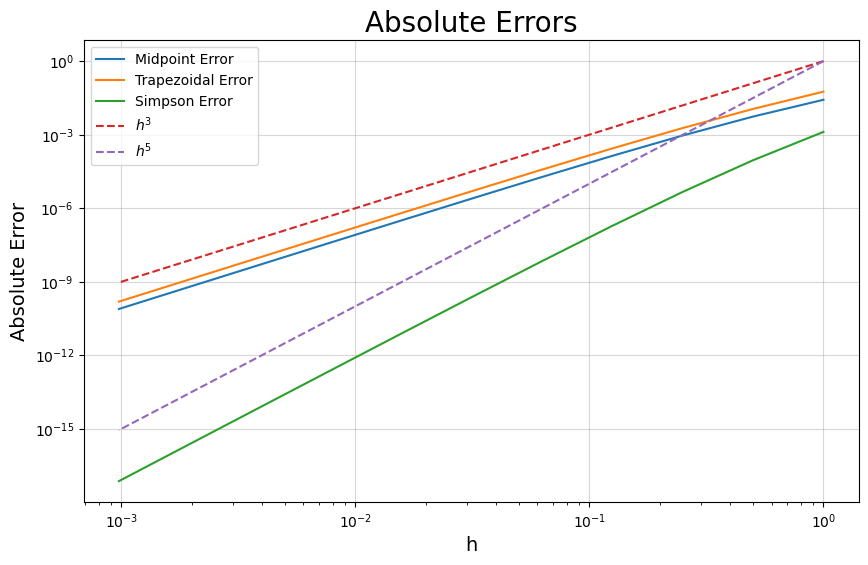

In [7]:
# define function f(x)
def myfunc(x):
    return 1/(1+x)

# Exact integral of f(x) from 0 to h
def exact_integral(h):
    return np.log(1 + h)

# Compute the integrals for different values of h
results = []
for k in range(11):
    h = 2 ** (-k)
    exact_result = exact_integral(h)
    mid_result = midpoint(myfunc, 0, h)
    trap_result = trapezoidal(myfunc, 0, h)
    simp_result = simpson(myfunc, 0, h)
    results.append((h, exact_result, mid_result, trap_result, simp_result))
    
error_mid = []
error_trap = []
error_simp = []
    # Print results
print("Results for the integral of f(x) = 1/(1 + x) on the interval [0, h] with different values of h=2^(-k):")
print("{:<15} {:<20} {:<20} {:<20} {:<20}".format("h", "Exact Result", "Midpoint", "Trapezoidal", "Simpson's"))
for result in results:
    h, exact, mid, trap, simp = result
    error_mid.append(np.abs(exact - mid))
    error_trap.append(np.abs(exact - trap))
    error_simp.append(np.abs(exact - simp))
    print("{:<15} {:<20.10f} {:<20.10f} {:<20.10f} {:<20.10f}".format(h, exact, mid, trap, simp))

# Plotting graphs
xArr = np.linspace(0, 10, 11)
hArr = 2 ** -xArr
plt.figure(figsize=(10, 6))
plt.loglog(hArr, error_mid, label = 'Midpoint Error')
plt.loglog(hArr, error_trap, label = 'Trapezoidal Error')
plt.loglog(hArr, error_simp, label = 'Simpson Error')

# h ^ gamma
def gfunc(h, gamma):
    return h**gamma

plt.loglog(hArr, gfunc(hArr, 3), '--', label = "$h^3$")
plt.loglog(hArr, gfunc(hArr, 5), '--', label = "$h^5$")


# Graph settings
plt.title("Absolute Errors", fontsize=20)
plt.xlabel("h", fontsize=14)
plt.ylabel("Absolute Error", fontsize=14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

Regarding error scaling, the trapezoidal and midpoint rules have error scaling like $h^3$ and the Simpson rule has an error scaling like $h^5$. For an error \~$h^3$ we expect the error, after doubling the number of nodes, to be cut by a factor of 8. For the midpoint and trapezoidal rules, we expect plotting (in a log-log plot) the error against h to be a line with slope 3, i.e. an error of order three. The error is of order $\gamma$. For the Simpson-Cavalieri rule, we expect a line with slope 5, i.e. an error of order five. 

### 2.8) c)

In [8]:
# Compute the ratios for each method
ratios_mid = np.zeros_like(error_mid)
ratios_trap = np.zeros_like(error_trap)
ratios_simp = np.zeros_like(error_simp)

# find the ratios between adjacent errors
for i in range(1, len(error_mid)):
    ratios_mid[i] = error_mid[i - 1] / error_mid[i]
    ratios_trap[i] = error_trap[i - 1] / error_trap[i]
    ratios_simp[i] = error_simp[i - 1] / error_simp[i]

# Set the first entry of each ratio array to np.nan
ratios_mid[0] = np.nan
ratios_trap[0] = np.nan
ratios_simp[0] = np.nan

# Compute the EOC for each method
gamma_mid = np.log(ratios_mid) / np.log(2)
gamma_trap = np.log(ratios_trap) / np.log(2)
gamma_simp = np.log(ratios_simp) / np.log(2)

# Print the results in a table with wider columns and extra space between columns
print("{:<15} {:<15} {:<15} {:<15}".format("h", "Midpoint EOC", "Trapezoid EOC", "Simpson EOC"))
for i in range(len(gamma_mid)):
    h, _, _, _, _ = results[i]
    print("{:<15} {:<15.5f} {:<15.5f} {:<15.5f}".format(h, gamma_mid[i], gamma_trap[i], gamma_simp[i]))

h               Midpoint EOC    Trapezoid EOC   Simpson EOC    
1               nan             nan             nan            
0.5             2.27661         2.34353         3.84225        
0.25            2.56846         2.59308         4.29837        
0.125           2.76036         2.76811         4.60613        
0.0625          2.87300         2.87520         4.78991        
0.03125         2.93451         2.93510         4.89127        
0.015625        2.96673         2.96688         4.94466        
0.0078125       2.98323         2.98327         4.97208        
0.00390625      2.99158         2.99159         4.98603        
0.001953125     2.99578         2.99578         4.99285        
0.0009765625    2.99789         2.99789         4.99867        


Above is a table which computes the experimental error of convergence (EOC) for each method. The table gives the value of EOC to an accuracy of 5 d.p.